In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D , Dropout
from tensorflow.keras.utils import to_categorical

In [8]:
train = pd.read_csv("/content/drive/MyDrive/Deepfake and Fake News Detection(Research Internship)/Deepfake Image/Datasets/112x112_2k_deepfake_images.csv").values
test  = pd.read_csv("/content/drive/MyDrive/Deepfake and Fake News Detection(Research Internship)/Deepfake Image/Datasets/112x112_500_test_deepfake_images.csv").values


trainX = train.reshape(2001,112,112,1).astype( 'float32' )
X_train = trainX / 255.0

y_train = train[:,-1]

#Reshape and normalize test data
testX = test.reshape(test.shape[0],112, 112, 1).astype( 'float32' )
X_test = testX / 255.0

y_test = test[:,-1]


ValueError: cannot reshape array of size 25090000 into shape (2001,112,112,1)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
#y_test = lb.fit_transform(y_test)

In [ ]:
#from tensorflow.keras.applications import EfficientNetV2S
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

from tensorflow.keras.applications import EfficientNetV2S

efficientnet_base = EfficientNetV2S(weights=None, include_top=False, input_shape=(64, 64, 1))
efficientnet_base.trainable = True

# No need to set `floatx` as normalization is included within EfficientNetV2S


#efficientnet_base = EfficientNetV2S(weights=None, include_top=False, input_shape=(124, 124, 1))
#efficientnet_base.trainable = True  # All layers are trainable

# Build the final model by adding a GlobalAveragePooling2D layer and a Dense layer with softmax activation
x = efficientnet_base.output
x = GlobalAveragePooling2D()(x)  # Reduce spatial dimensions to a single vector
output = Dense(2, activation='softmax')(x)  # Output layer for multi-class classification (replace num_classes with your actual number of classes)

model = Model(inputs=efficientnet_base.input, outputs=output)


In [ ]:
##### Train the model
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])
hist = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
3/3 [==============================] - 42s 692ms/step - loss: 0.8372 - accuracy: 0.4625
Epoch 2/50
3/3 [==============================] - 2s 651ms/step - loss: 0.9212 - accuracy: 0.4000
Epoch 3/50
3/3 [==============================] - 2s 799ms/step - loss: 0.8846 - accuracy: 0.5125
Epoch 4/50
3/3 [==============================] - 3s 1s/step - loss: 0.7995 - accuracy: 0.5750
Epoch 5/50
3/3 [==============================] - 3s 1s/step - loss: 0.8375 - accuracy: 0.5500
Epoch 6/50
3/3 [==============================] - 3s 977ms/step - loss: 1.0901 - accuracy: 0.4625
Epoch 7/50
3/3 [==============================] - 3s 942ms/step - loss: 0.9225 - accuracy: 0.4875
Epoch 8/50
3/3 [==============================] - 3s 934ms/step - loss: 0.9268 - accuracy: 0.4250
Epoch 9/50
3/3 [==============================] - 3s 1s/step - loss: 0.9156 - accuracy: 0.4875
Epoch 10/50
3/3 [==============================] - 3s 912ms/step - loss: 0.8546 - accuracy: 0.5250
Epoch 11/50
3/3 [==========

In [ ]:
import winsound
frequency = 2500
duration = 1000
winsound.Beep(frequency, duration)

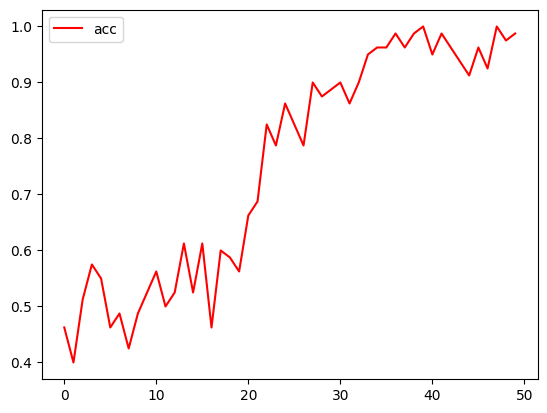

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
#plt.plot(hist.history['loss'],color = 'green',label = 'loss')
plt.plot(hist.history['accuracy'],color = 'red',label = 'acc')
#fig.suptitle('loss_graph',fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()